In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import torch

import constant
from constant import org_cols, wsr_cols, geo_pow_cols, geo_log_cols, semigeo_cols
import myplot
from models import MLP_Regression, train_model, train_test_validation
path = "SL_SC_1/"
model_path = constant.model_path + path
plot_path = constant.plot_path + path

# Neural Network Train

In [2]:
df_train = pd.read_parquet(constant.SL_SC_TRAIN_path)
df_evl = pd.read_parquet(constant.SL_SC_EVL_path)

In [3]:
len(df_train)

445587

In [5]:
target = ["VAERDI"]

## Original Features


In [6]:
input_size = 45
hidden_size = 600
f_active = "relu"
lr = 0.01
num_epochs = 40

### Validation

In [7]:
# train_hists, test_hists = train_test_validation(df=df_train, features=org_cols, model=model_original, lr=lr, num_epochs=num_epochs)

In [8]:
# myplot.k_fold_validation(n_groups, k_scores, path=plot_path+"original_k_fold.png")

### Train model

In [9]:
x_train, y_train = df_train[org_cols].values, df_train[target].values
x_train_tensor = torch.tensor(x_train, dtype = torch.float)
y_train_tensor = torch.tensor(y_train, dtype = torch.float)

x_test, y_test = df_evl[org_cols].values, df_evl[target].values
x_test_tensor = torch.tensor(x_test, dtype = torch.float)
y_test_tensor = torch.tensor(y_test, dtype = torch.float)

In [10]:
model_original, train_hist_original, test_hist_original = train_model(
                                            input_size,
                                            hidden_size,
                                            f_active,
                                            lr,
                                            num_epochs,
                                            x_train_tensor, 
                                            y_train_tensor,
                                            x_test_tensor,
                                            y_test_tensor,
                                            path=model_path+"original_model.pth")

Epoch 0 train loss: 0.09101973474025726 test loss: 0.09839421510696411
Epoch 10 train loss: 0.11705820262432098 test loss: 0.08285874128341675
Epoch 20 train loss: 0.026587262749671936 test loss: 0.033988140523433685
Epoch 30 train loss: 0.0218370221555233 test loss: 0.07061287760734558
Epoch 39 train loss: 0.012342650443315506 test loss: 0.01852698251605034


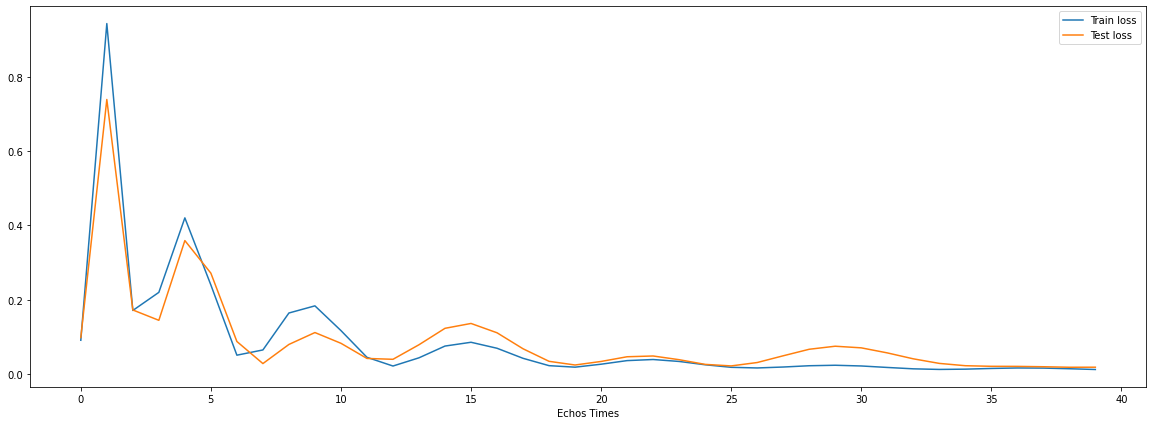

In [11]:
myplot.model_loss({"Train loss":train_hist_original, "Test loss":test_hist_original}, path=plot_path+"original_loss.png")

## Windshear Features

In [1]:
input_size = 44
hidden_size = 500
f_active = "tanh"
lr = 0.01
num_epochs = 40

In [13]:
# k_scores = timeseries_kfold_validation_training(df=df_train, features=wsr_cols, target=target, n_groups=n_groups, model=model_wsr, lr=lr, num_epochs=num_epochs)

In [14]:
# myplot.k_fold_validation(n_groups, k_scores, path=plot_path+"wsr_k_fold.png")

### Train model

In [15]:
x_train, y_train = df_train[wsr_cols].values, df_train[target].values
x_train_tensor = torch.tensor(x_train, dtype = torch.float)
y_train_tensor = torch.tensor(y_train, dtype = torch.float)

x_test, y_test = df_evl[wsr_cols].values, df_evl[target].values
x_test_tensor = torch.tensor(x_test, dtype = torch.float)
y_test_tensor = torch.tensor(y_test, dtype = torch.float)

In [16]:
model_wsr, train_hist_wsr, test_hist_wsr = train_model(input_size,
                                            hidden_size,
                                            f_active,
                                            lr,
                                            num_epochs,
                                            x_train_tensor, 
                                            y_train_tensor,
                                            x_test_tensor,
                                            y_test_tensor,
                                            path=model_path+"wsr_model.pth")

Epoch 0 train loss: 0.0580146424472332 test loss: 0.06432938575744629
Epoch 10 train loss: 0.015657050535082817 test loss: 0.048981089144945145
Epoch 20 train loss: 0.010330813936889172 test loss: 0.014467490836977959
Epoch 30 train loss: 0.009809575974941254 test loss: 0.015709223225712776
Epoch 39 train loss: 0.00919363833963871 test loss: 0.013370377011597157


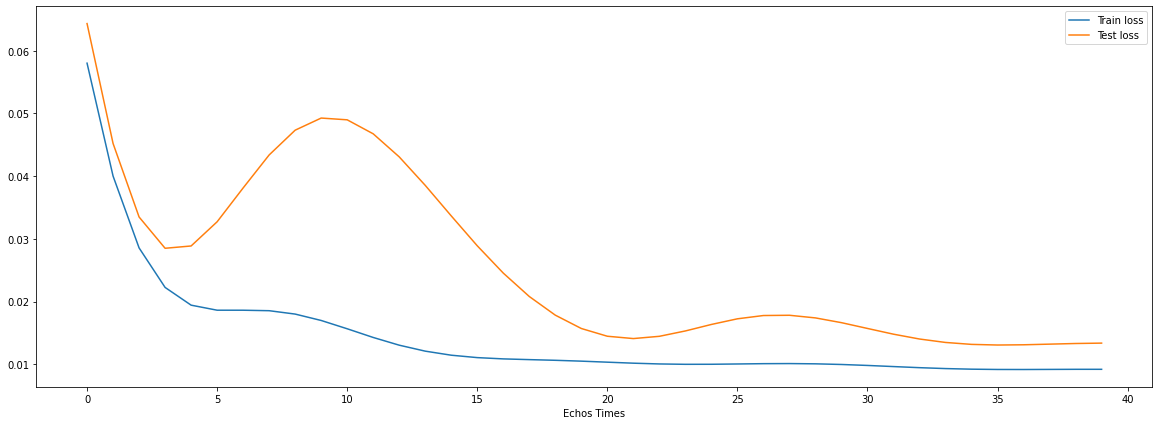

In [17]:
myplot.model_loss({"Train loss":train_hist_wsr, "Test loss":test_hist_wsr}, path=plot_path+"wsr_loss.png")

## Geo Features

In [18]:
input_size = 46
hidden_size = 500
f_active = "tanh"
lr = 0.01
num_epochs = 30

In [19]:
# k_scores = timeseries_kfold_validation_training(df=df_train, features=geo_cols, target=target, n_groups=n_groups, model=model_geo, lr=lr, num_epochs=num_epochs)

In [20]:
# myplot.k_fold_validation(n_groups, k_scores, path=plot_path+"geo_k_fold.png")

### Train model

In [21]:
x_train, y_train = df_train[geo_pow_cols].values, df_train[target].values
x_train_tensor = torch.tensor(x_train, dtype = torch.float)
y_train_tensor = torch.tensor(y_train, dtype = torch.float)

x_test, y_test = df_evl[geo_pow_cols].values, df_evl[target].values
x_test_tensor = torch.tensor(x_test, dtype = torch.float)
y_test_tensor = torch.tensor(y_test, dtype = torch.float)

In [24]:
model_geo, train_hist_geo, test_hist_geo = train_model(input_size,
                                            hidden_size,
                                            f_active,
                                            lr,
                                            num_epochs,
                                            x_train_tensor, 
                                            y_train_tensor, 
                                            x_test_tensor,
                                            y_test_tensor,
                                            path=model_path+"geo_model.pth")

Epoch 0 train loss: 0.09098027646541595 test loss: 0.09406935423612595
Epoch 10 train loss: 0.01825665682554245 test loss: 0.021469397470355034
Epoch 20 train loss: 0.012525317259132862 test loss: 0.015006454661488533
Epoch 29 train loss: 0.009967108257114887 test loss: 0.014322282746434212


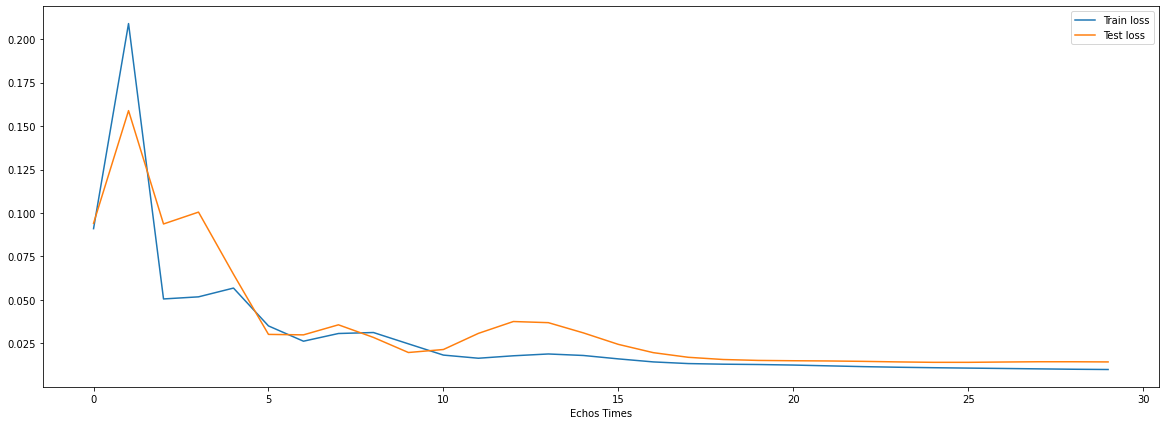

In [25]:
myplot.model_loss({"Train loss":train_hist_geo,"Test loss":test_hist_geo}, path=plot_path+"geo_loss.png")

# Semigeo

In [26]:
input_size = 47
hidden_size = 500
f_active = "leaky_relu"
lr = 0.001
num_epochs = 40

In [27]:
# k_scores = timeseries_kfold_validation_training(df=df_train, features=semigeo_cols, target=target, n_groups=n_groups, model=model_semigeo, lr=lr, num_epochs=num_epochs)

In [28]:
# myplot.k_fold_validation(n_groups, k_scores, path=plot_path+"semigeo_k_fold.png")

### Train model

In [29]:
x_train, y_train = df_train[semigeo_cols].values, df_train[target].values
x_train_tensor = torch.tensor(x_train, dtype = torch.float)
y_train_tensor = torch.tensor(y_train, dtype = torch.float)

x_test, y_test = df_evl[semigeo_cols].values, df_evl[target].values
x_test_tensor = torch.tensor(x_test, dtype = torch.float)
y_test_tensor = torch.tensor(y_test, dtype = torch.float)

In [30]:
model_semigeo, train_hist_semigeo, test_hist_semigeo = train_model(input_size,
                                            hidden_size,
                                            f_active,
                                            lr,
                                            num_epochs,
                                            x_train_tensor, 
                                            y_train_tensor,
                                            x_test_tensor,
                                            y_test_tensor,
                                            path=model_path+"semigeo_model.pth")

Epoch 0 train loss: 0.048926882445812225 test loss: 0.08773476630449295
Epoch 10 train loss: 0.015888452529907227 test loss: 0.023294799029827118
Epoch 20 train loss: 0.01071564108133316 test loss: 0.017983313649892807
Epoch 30 train loss: 0.009679167531430721 test loss: 0.016541490331292152
Epoch 39 train loss: 0.008797939866781235 test loss: 0.013827400282025337


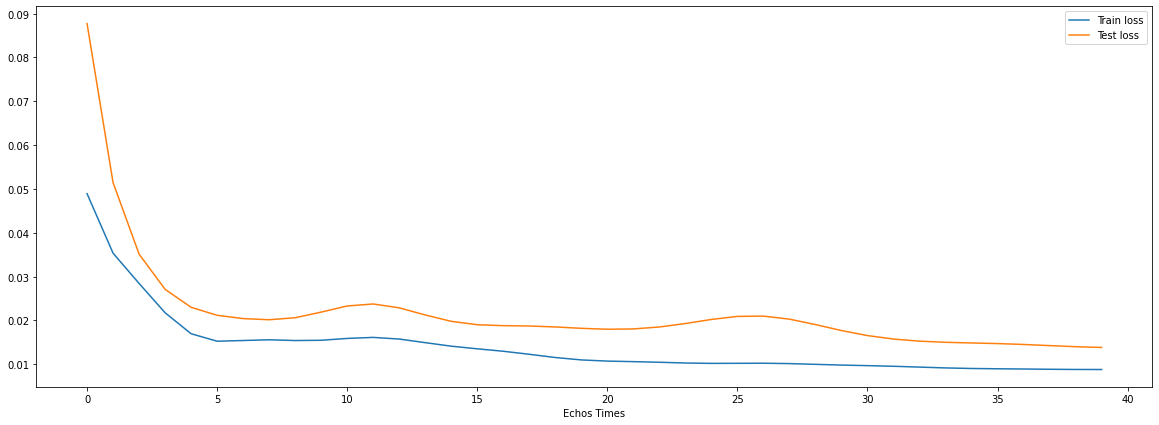

In [31]:
myplot.model_loss({"Train loss":train_hist_semigeo, "Test loss":test_hist_semigeo}, path=plot_path+"semigeo_loss.png")